In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

## running the model

In [3]:
from Regard import init
args = init(verbose=1)
print('Parameters=', args)

path = '_Regard.pt'

Parameters= {'batch_size': 16, 'test_batch_size': 1, 'valid_size': 0.2, 'epochs': 100, 'lr': 0.0065, 'momentum': 0.48, 'no_cuda': True, 'num_processes': 1, 'seed': 42, 'log_interval': 10, 'dimension': 25, 'verbose': 1, 'conv1_dim': 4, 'conv1_kernel_size': 7, 'conv2_dim': 13, 'conv2_kernel_size': 5, 'stride1': 4, 'stride2': 4, 'crop': 290, 'fullsize': 360, 'size': 290, 'mean': 0.36, 'std': 0.3}


In [4]:
!ls -l {path}
!rm {path}

ls: _Regard.pt: No such file or directory
rm: _Regard.pt: No such file or directory


In [5]:
from Regard import ML
ml = ML(args)

import os
import torch
if os.path.isfile(path):
    ml.model.load_state_dict(torch.load(path))
    print('Loading file', path)
else:
    print('Training model...')
    ml.main()
    torch.save(ml.model.state_dict(), path) #save the neural network state
    print('Model saved at', path)

cuda? False
cuda? False
Found 799 sample images;  640  to train 159 to test
Training model...


	Train Epoch: 1 [0/640 (0%)]	Loss: 1.350445
	Train Epoch: 1 [160/640 (25%)]	Loss: 1.319829
	Train Epoch: 1 [320/640 (50%)]	Loss: 1.271161
	Train Epoch: 1 [480/640 (75%)]	Loss: 1.336852
	Train Epoch: 2 [0/640 (0%)]	Loss: 1.107668
	Train Epoch: 2 [160/640 (25%)]	Loss: 1.303024
	Train Epoch: 2 [320/640 (50%)]	Loss: 1.125721
	Train Epoch: 2 [480/640 (75%)]	Loss: 0.887541
	Train Epoch: 3 [0/640 (0%)]	Loss: 0.785251
	Train Epoch: 3 [160/640 (25%)]	Loss: 0.400312
	Train Epoch: 3 [320/640 (50%)]	Loss: 0.571043
	Train Epoch: 3 [480/640 (75%)]	Loss: 1.213288
	Train Epoch: 4 [0/640 (0%)]	Loss: 0.463163
	Train Epoch: 4 [160/640 (25%)]	Loss: 0.476766
	Train Epoch: 4 [320/640 (50%)]	Loss: 0.313190
	Train Epoch: 4 [480/640 (75%)]	Loss: 1.118737
	Train Epoch: 5 [0/640 (0%)]	Loss: 0.808716
	Train Epoch: 5 [160/640 (25%)]	Loss: 0.217665
	Train Epoch: 5 [320/640 (50%)]	Loss: 0.292407
	Train Epoch: 5 [480/640 (75%)]	Loss: 0.570560
	Train Epoch: 6 [0/640 (0%)]	Loss: 0.207012
	Train Epoch: 6 [160/640 (25%)]

	Train Epoch: 44 [480/640 (75%)]	Loss: 0.004228
	Train Epoch: 45 [0/640 (0%)]	Loss: 0.000608
	Train Epoch: 45 [160/640 (25%)]	Loss: 0.002421
	Train Epoch: 45 [320/640 (50%)]	Loss: 0.021369
	Train Epoch: 45 [480/640 (75%)]	Loss: 0.023684
	Train Epoch: 46 [0/640 (0%)]	Loss: 0.008815
	Train Epoch: 46 [160/640 (25%)]	Loss: 0.001458
	Train Epoch: 46 [320/640 (50%)]	Loss: 0.000320
	Train Epoch: 46 [480/640 (75%)]	Loss: 0.000191
	Train Epoch: 47 [0/640 (0%)]	Loss: 0.002661
	Train Epoch: 47 [160/640 (25%)]	Loss: 0.000324
	Train Epoch: 47 [320/640 (50%)]	Loss: 0.001022
	Train Epoch: 47 [480/640 (75%)]	Loss: 0.046961
	Train Epoch: 48 [0/640 (0%)]	Loss: 0.002568
	Train Epoch: 48 [160/640 (25%)]	Loss: 0.000074
	Train Epoch: 48 [320/640 (50%)]	Loss: 0.002466
	Train Epoch: 48 [480/640 (75%)]	Loss: 0.000163
	Train Epoch: 49 [0/640 (0%)]	Loss: 0.006209
	Train Epoch: 49 [160/640 (25%)]	Loss: 0.000011
	Train Epoch: 49 [320/640 (50%)]	Loss: 0.000045
	Train Epoch: 49 [480/640 (75%)]	Loss: 0.000090
	Train 

	Train Epoch: 88 [160/640 (25%)]	Loss: 0.000037
	Train Epoch: 88 [320/640 (50%)]	Loss: 0.000003
	Train Epoch: 88 [480/640 (75%)]	Loss: 0.000204
	Train Epoch: 89 [0/640 (0%)]	Loss: 0.000011
	Train Epoch: 89 [160/640 (25%)]	Loss: 0.000008
	Train Epoch: 89 [320/640 (50%)]	Loss: 0.000190
	Train Epoch: 89 [480/640 (75%)]	Loss: 0.000008
	Train Epoch: 90 [0/640 (0%)]	Loss: 0.000006
	Train Epoch: 90 [160/640 (25%)]	Loss: 0.000005
	Train Epoch: 90 [320/640 (50%)]	Loss: 0.000071
	Train Epoch: 90 [480/640 (75%)]	Loss: 0.018726
	Train Epoch: 91 [0/640 (0%)]	Loss: 0.000010
	Train Epoch: 91 [160/640 (25%)]	Loss: 0.000002
	Train Epoch: 91 [320/640 (50%)]	Loss: 0.000001
	Train Epoch: 91 [480/640 (75%)]	Loss: 0.000199
	Train Epoch: 92 [0/640 (0%)]	Loss: 0.000006
	Train Epoch: 92 [160/640 (25%)]	Loss: 0.000018
	Train Epoch: 92 [320/640 (50%)]	Loss: 0.000003
	Train Epoch: 92 [480/640 (75%)]	Loss: 0.000006
	Train Epoch: 93 [0/640 (0%)]	Loss: 0.000132
	Train Epoch: 93 [160/640 (25%)]	Loss: 0.000106
	Train 

## testing the model

In [6]:
Accuracy = ml.test()


Test set: Average loss: 0.5630, Accuracy: 152/159 (95%)



target:right
pred  :center


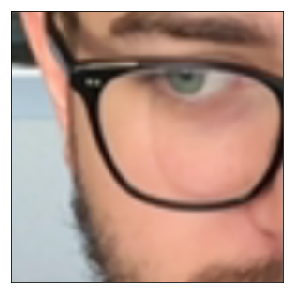

target:blink
pred  : left


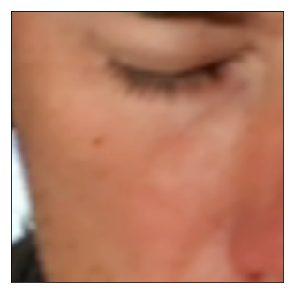

target:blink
pred  :right


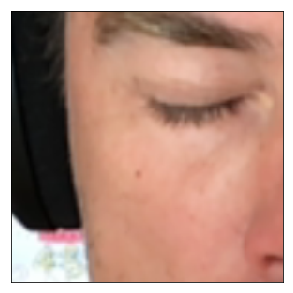

target:right
pred  :center


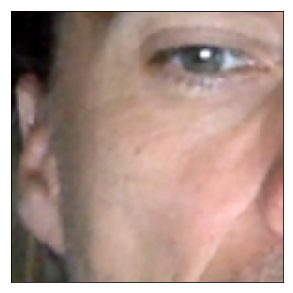

target:right
pred  :center


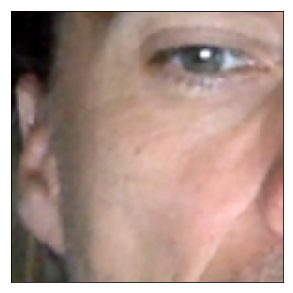

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

for data, labels in ml.dataset.test_loader:
    fig, ax = ml.show(only_wrong=True)
    plt.show() 


## cross-validation

In [ ]:
Accuracy = []
for _ in range(30):
    args = init(verbose=0, log_interval=0, seed=42+_)
    ml = ML(args)
    ml.main()
    Accuracy.append(ml.test())
print(Accuracy)

%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(Accuracy) 

plt.show() 

Test set: Final Accuracy: 95.597%
Test set: Final Accuracy: 93.711%
